In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import os
import pandas as pd
from sklearn.externals import joblib
import random
from retina.retina_theanized import Retina
import numpy as np

In [5]:
fd1 = "../eventtracer/mc_sig_hits/03695701_0000422027.hits.csv"
xyz1 = pd.DataFrame.from_csv(fd1,)[["X","Y","Z"]].values
fd2 = "../eventtracer/mc_bg_hits/00111190_0000000004.hits.csv"
xyz2 = pd.DataFrame.from_csv(fd2,)[["X","Y","Z"]].values

def _response(t):

    ks = np.zeros(3)
    #ks[2]+=1
    ks[0] = 3
    ks[1] = 3
    ks[2] = -100+100*t
    alpha_c=0
    beta_c =0
    #ks = KS[evtids_ks[i]][2]

    xdim=ydim=32
    dalpha = np.pi/3
    dbeta = np.pi/3
    alphas = np.linspace(-dalpha+alpha_c, alpha_c+dalpha,num=xdim)
    bethas = np.linspace(-dbeta+beta_c, beta_c+dbeta,num=ydim)
    retina = Retina(ks,alphas,bethas,variance=50,power=2)

    n_pts = 1000
    xyz1_hits = xyz1[xyz1[:,2]>=ks[2]]
    xyz1_hits = xyz1_hits[np.argsort(xyz1_hits[:,2])[:n_pts]]

    xyz2_hits = xyz2[xyz2[:,2]>=ks[2]]
    xyz2_hits = xyz2_hits[np.argsort(xyz2_hits[:,2])[:n_pts]]
    
    
    
    nthreads = 1
    
    img1 = retina.response(xyz1_hits,block_size = (len(xyz1)-1)/nthreads+1,n_jobs=nthreads)
    img2 = retina.response(xyz2_hits,block_size = (len(xyz2)-1)/nthreads+1,n_jobs=nthreads)
    return ks[2],img1,img2

tasks = map(joblib.delayed(_response),range(150))
frames = joblib.Parallel(n_jobs=-1)(tasks)

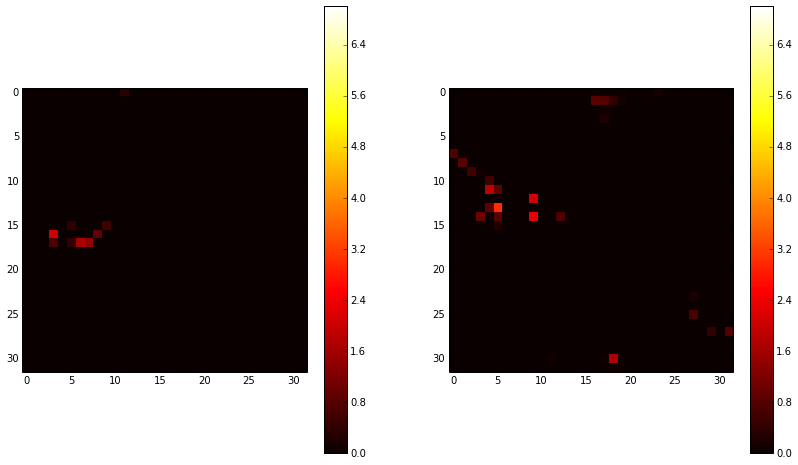

In [6]:
from IPython import display
for z,img1,img2 in frames:
    xdim=ydim=32
    
    
    plt.figure(figsize=[14,8])
    _p0 = plt.subplot(1,2,0)
    _im0 = _p0.imshow(img1.reshape(xdim,ydim),vmin=0,vmax=7,interpolation='nearest',cmap="hot")
    _p1 = plt.subplot(1,2,1)
    _im1 = _p1.imshow(img2.reshape(xdim,ydim),vmin=0,vmax=7,interpolation='nearest',cmap="hot")
    

    plt.colorbar(_im0,ax=_p0)
    plt.colorbar(_im1,ax=_p1)
    plt.show()
    #print z
    display.clear_output(wait=True)
